CG MSM from "primitive clustering" along rama-plot
====

In [1]:
import pyemma
pyemma.__version__

'2.1.1'

In [2]:
import os
%pylab inline
matplotlib.rcParams.update({'font.size': 12})

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
import msmbuilder
from msmbuilder.msm.ratematrix import ContinuousTimeMSM
import scipy
from msmtools.analysis.dense.decomposition import eigenvectors, eigenvalues
import operator

/home/theorie/rudzinski/soft/anaconda/envs/PyEmma-new/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/theorie/rudzinski/soft/anaconda/envs/PyEmma-new/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Read in the dtrajs
------

In [4]:
base='/data/isilon/rudzinski/cluster_tmp/ALA4/sim/'
Nsets=2
Nruns=5

for iset in range(Nsets):
    for run in range(Nruns):
        path = base+'set'+str(iset+1)+'/run'+str(run+1)+'/mapped/'
        run_file = path+'traj_intra.dat'
        if (run==0 and iset==0):
            dtraj = np.genfromtxt(run_file)[:,1:]
            print len(np.genfromtxt(run_file)[:,1:])
        else:
            dtraj = np.vstack((dtraj,np.genfromtxt(run_file)[:,1:]))
            print len(np.genfromtxt(run_file)[:,1:])
#dtraj = np.genfromtxt(path+'traj_intra.dat')[:,1:]

50001
50001
50001
50001
50001
50001
50001
50001
50001
50001


In [5]:
# save full traj
np.save('dtraj_OG.npy',dtraj)

In [10]:
# convert dihedral
dtraj_conv = np.hstack((dtraj,dtraj[None,:,1].T))
dtraj_conv[:,1] = np.sin(dtraj_conv[:,1]*np.pi/180.)
dtraj_conv[:,2] = np.cos(dtraj_conv[:,2]*np.pi/180.)

In [20]:
import math 
print dtraj[0,1]*np.pi/180.
print dtraj_conv[0,1]
print dtraj_conv[0,2]
print math.asin(dtraj_conv[0,1])
print math.acos(dtraj_conv[0,2])

-2.46225814883604
-0.6282754138675696
-0.7779910053011758
-0.679334504754
2.46225814884


In [21]:
angle = 2.46
print angle
print np.sin(angle)
print np.cos(angle)
print math.asin(np.sin(angle))
print math.acos(np.cos(angle))


2.46
0.6300306299958922
-0.776570283533293
0.68159265359
2.46


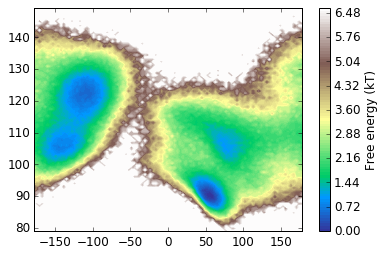

In [25]:
fig, ax = mplt.plot_free_energy(dtraj[:,1], dtraj[:,0],cmap='terrain')


In [12]:
# shift and normalize in each dimension
from copy import deepcopy
dtraj_trans = deepcopy(dtraj_conv)
mu = []
sd = []
for dim in range(dtraj_conv.shape[1]):
    mu.append(np.mean(dtraj_conv[:,dim]))
    dtraj_trans[:,dim] -= mu[dim]
    sd.append(np.sqrt(np.var(dtraj_conv[:,dim])))
    dtraj_trans[:,dim] /= sd[dim]
np.savetxt('mu.dat',mu,fmt='%f')
np.savetxt('sd.dat',sd,fmt='%f')

[110.71534603307937, -0.030819368400501593, -0.43308801371708938]
[12.219837898390201, 0.7707091329219562, 1.8956536802244421]


In [26]:
# save the reshaped data
N_dim=3
np.savetxt('dtraj_tica'+str(N_dim)+'D.dat',dtraj_trans)

In [27]:
# save the traj len for MPP analysis
np.savetxt('traj_len.dat', [dtraj.shape[0]/10.])

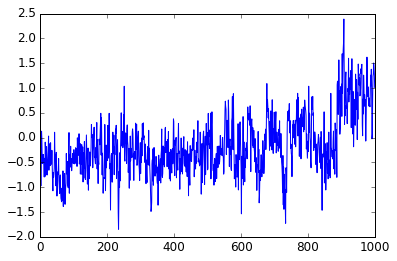

In [9]:
plt.plot(dtraj_trans[0:1000,0])